
# Prediction Of Diabetes Using Ensemble<br>Learning & Ant Colony Optimization

### 1. Importing Libraries
Importing all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import random
import math
import time
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from scipy import spatial
from scipy.spatial.distance import cosine
from sklearn import svm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

### 2. Loading Dataset
Loading the required Dataset as Dataframe.

In [2]:
data1 = pd.read_csv("diabetes.csv")
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 3. Data Cleaning and Preprocessing
Replacing the column names of the dataset with their actual names.<br>
Converting the numeric features to categorical features.

In [3]:
data1.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
                 'Insulin','BMI','DiabetesPedigreeFunction',
                 'Age','Outcome']


data1['Outcome'][data1['Outcome'] == 0] = 'healthy'
data1['Outcome'][data1['Outcome'] == 1] = 'Diabetic'


data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,healthy
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,healthy
4,0,137,40,35,168,43.1,2.288,33,Diabetic
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,healthy
764,2,122,70,27,0,36.8,0.340,27,healthy
765,5,121,72,23,112,26.2,0.245,30,healthy
766,1,126,60,0,0,30.1,0.349,47,Diabetic


Checking missing entries in the dataset columnwise.

In [4]:
data1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### This concludes that the dataset has no null values

Describing numeric features of the dataset.

In [5]:
data1.describe(include =[np.number])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Describing categorical features of the dataset.

In [6]:
data1.describe(include =[np.object])

,Outcome
count,768
unique,2
top,healthy
freq,500


### 5. ACO Feature Selection and Model Building

Applying AdaBoost Model and calculating Accuracy.

In [7]:
data = pd.read_csv("diabetes.csv")
data_columns = data.drop(['Outcome'],axis=1)
label = data['Outcome'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = AdaBoostClassifier(n_estimators=10)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for AdaBoost: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for AdaBoost: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for AdaBoost: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for AdaBoost: ', f1)


Accuracy for AdaBoost:  69.48051948051948
Precision value for AdaBoost:  0.58
Recall value for AdaBoost:  0.5272727272727272
F1 score for AdaBoost:  0.5523809523809523


Applying AdaBoost Model with ACO and calculating Accuracy.

In [24]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=30):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, Outcome):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, Outcome,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = AdaBoostClassifier(n_estimators=10)
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test, y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for AdaBoost: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for AdaBoost: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for AdaBoost: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for AdaBoost: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("diabetes.csv")
data_columns = data.drop(['Outcome'],axis=1)
label = data['Outcome'].values
from itertools import chain
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(list(chain.from_iterable(v1_abs)), list(chain.from_iterable(v2_abs))))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 8

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=100,evaporation=0.2, num_FS=10)

aco2.print()

aco2.run(data_bank = data, Outcome = label)

Dataset Information(Samples, Attributes): (768, 9)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					8
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					100
Number of Attributes to be selected:			10
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 100 iterations:
 
Accuracy for AdaBoost:  75.97402597402598
Precision value for AdaBoost:  0.6551724137931034
Recall value for AdaBoost:  0.6909090909090909
F1 score 

Applying Bagging Model and calculating Accuracy.

In [10]:
data = pd.read_csv("diabetes.csv")
data_columns = data.drop(['Outcome'],axis=1)
label = data['Outcome'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = BaggingClassifier()
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Bagging: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Bagging: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Bagging: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Bagging: ', f1)


Accuracy for Bagging:  69.48051948051948
Precision value for Bagging:  0.5952380952380952
Recall value for Bagging:  0.45454545454545453
F1 score for Bagging:  0.5154639175257733


Applying Bagging Model with ACO and calculating Accuracy.

In [16]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=10):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, Outcome):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, Outcome,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = BaggingClassifier()
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test,y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Bagging: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Bagging: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Bagging: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Bagging: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("diabetes.csv")
data_columns = data.drop(['Outcome'],axis=1)
label = data['Outcome'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(list(chain.from_iterable(v1_abs)), list(chain.from_iterable(v2_abs))))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 8

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=100,evaporation=0.2, num_FS=10)

aco2.print()

aco2.run(data_bank = data, Outcome = label)

Dataset Information(Samples, Attributes): (768, 9)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					8
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					100
Number of Attributes to be selected:			10
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 100 iterations:
6 -> 7 -> 0 -> 5 -> 1 -> 2 -> 3 -> 4 
Accuracy for Bagging:  75.32467532467533
Precision value for Bagging:  0.6415094339622641
Recall value for Baggi

Applying Random Forest Model and calculating Accuracy.

In [19]:
data = pd.read_csv("diabetes.csv")
data_columns = data.drop(['Outcome'],axis=1)
label = data['Outcome'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Random Forest: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Random Forest: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Random Forest: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Random Forest: ', f1)


Accuracy for Random Forest:  72.72727272727273
Precision value for Random Forest:  0.6382978723404256
Recall value for Random Forest:  0.5454545454545454
F1 score for Random Forest:  0.5882352941176471


Applying Random Forest Model with ACO and calculating Accuracy.

In [15]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=8):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, Outcome):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, Outcome,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = RandomForestClassifier(n_estimators=10)
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test,y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Random Forest: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Random Forest: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Random Forest: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Random Forest: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("diabetes.csv")
data_columns = data.drop(['Outcome'],axis=1)
label = data['Outcome'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(list(chain.from_iterable(v1_abs)), list(chain.from_iterable(v2_abs))))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 8

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=100,evaporation=0.2, num_FS=10)

aco2.print()

aco2.run(data_bank = data, Outcome = label)

Dataset Information(Samples, Attributes): (768, 9)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					8
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					100
Number of Attributes to be selected:			10
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 100 iterations:
6 -> 7 -> 0 -> 5 -> 1 -> 2 -> 3 -> 4 
Accuracy for Random Forest:  78.57142857142857
Precision value for Random Forest:  0.7111111111111111
Recall val

Applying Gradient Boosting Model and calculating Accuracy.

In [17]:
data = pd.read_csv("diabetes.csv")
data_columns = data.drop(['Outcome'],axis=1)
label = data['Outcome'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Gradient Boosting: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Gradient Boosting: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Gradient Boosting: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Gradient nBoosting: ', f1)


Accuracy for Gradient Boosting:  72.72727272727273
Precision value for Gradient Boosting:  0.6382978723404256
Recall value for Gradient Boosting:  0.5454545454545454
F1 score for Gradient nBoosting:  0.5882352941176471


Applying Gradient Boosting Model with ACO and calculating Accuracy.

In [18]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=10):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, Outcome):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, Outcome,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = GradientBoostingClassifier()
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test,y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Gradient Boosting: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Gradient Boosting: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Gradient Boosting: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Gradient nBoosting: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("diabetes.csv")
data_columns = data.drop(['Outcome'],axis=1)
label = data['Outcome'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(list(chain.from_iterable(v1_abs)), list(chain.from_iterable(v2_abs))))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 8

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=100,evaporation=0.2, num_FS=10)

aco2.print()

aco2.run(data_bank = data, Outcome = label)

Dataset Information(Samples, Attributes): (768, 9)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					8
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					100
Number of Attributes to be selected:			10
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 100 iterations:
 
Accuracy for Gradient Boosting:  74.67532467532467
Precision value for Gradient Boosting:  0.6379310344827587
Recall value for Gradient Boosting:  0

Applying Extra Trees Model and calculating Accuracy.

In [19]:
data = pd.read_csv("diabetes.csv")
data_columns = data.drop(['Outcome'],axis=1)
label = data['Outcome'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = ExtraTreesClassifier()
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Extra Trees: ",acc)
precision= precision_score(y_test, y_pred, average='binary')
print('Precision value for Extra Trees: ',precision)
recall= recall_score(y_test, y_pred, average='binary')
print('Recall value for Extra Trees: ', recall)
f1= f1_score(y_test, y_pred, average='binary')
print('F1 score for Extra Trees: ', f1)


Accuracy for Extra Trees:  71.42857142857143
Precision value for Extra Trees:  0.6222222222222222
Recall value for Extra Trees:  0.509090909090909
F1 score for Extra Trees:  0.5599999999999999


Applying Extra Trees Model with ACO and calculating Accuracy.

In [20]:
class Accuracy:

    def __init__(self, iteration):
        self.solution = []
        self.accuracy = None

    def setSolution(self, solution, accuracy):
        self.solution = solution
        self.accuracy = accuracy
    
    def obtainAccuracy_final(self):
        return self.accuracy

    def obtainSolution_final(self):
        return self.solution

class Edge:

    def __init__(self, origin, destination, cost):
        self.origin = origin
        self.destination = destination
        self.cost = cost
        self.pheromone = None

    def obtainOrigin(self):
        return self.origin

    def obtainDestination(self):
        return self.destination

    def obtainCost(self):
        return self.cost

    def obtainPheromone(self):
        return self.pheromone

    def setPheromone(self, pheromone):
        self.pheromone = pheromone

class Graph:

    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.edges = {}
        self.neighbors = {} 
        self.vertices = {}  

    def addEdge(self, origin, destination, cost):
        edge = Edge(origin=origin, destination=destination, cost=cost)
        self.edges[(origin, destination)] = edge
        if origin not in self.neighbors:
            self.neighbors[origin] = [destination]
        else:
            self.neighbors[origin].append(destination)

    def obtainCostEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainCost()

    def obtainPheromoneEdge(self, origin, destination):
        return self.edges[(origin, destination)].obtainPheromone()

    def setPheromoneEdge(self, origin, destination, pheromone):
        self.edges[(origin, destination)].setPheromone(pheromone)

    def obtainCostPath(self, path):
        cost = 0
        for i in range(self.num_vertices - 1):
            cost += self.obtainCostEdge(path[i], path[i + 1])

        cost += self.obtainCostEdge(path[-1], path[0])
        return cost


class GraphComplete(Graph):

    def generate(self, matrix):
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if i != j:
                    weight = matrix[i][j] 
                    self.addEdge(i, j, weight)


class Ant:

    def __init__(self, city):
        self.city = city
        self.solution = []
        self.cost = None
        self.accuracy = None

    def obtainCity(self):
        return self.city

    def setCity(self, city):
        self.city = city

    def obtainSolution(self):
        return self.solution

    def setSolution(self, solution, accuracy):

        if not self.accuracy:
            self.solution = solution[:]
            self.accuracy = accuracy
        else:
            if accuracy < self.accuracy:
                self.solution = solution[:]
                self.accuracy = accuracy
    
    def obtainCostSolution(self):
        return self.cost
    
    def obtainAccuracy(self):
        return self.accuracy

class ACO:

    def __init__(self, graph, num_ants, alpha=1.0, beta=5.0, iterations=10,
                 evaporation=0.2, num_FS=8):
        self.graph = graph
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.evaporation = evaporation 
        self.num_FS = num_FS  
        self.ants = [] 
        self.accuracies = []  

        list_cities = [city for city in range(self.graph.num_vertices)]
        for k in range(self.num_ants):
            city_ant = random.choice(list_cities)
            list_cities.remove(city_ant)
            self.ants.append(Ant(city=city_ant))
            if not list_cities:
                list_cities = [city for city in range(self.graph.num_vertices)]

        cost_greedy = 0.0  
        vertex_initial = random.randint(1, graph.num_vertices) 
        vertex_current = vertex_initial
        visited = [vertex_current]  
        while True:
            neighbors = (self.graph.neighbors[vertex_current])[:]
            (costs, selected) = ([], {})
            for neighbor in neighbors:
                if neighbor not in visited:
                    cost = self.graph.obtainCostEdge(vertex_current, neighbor)
                    selected[cost] = neighbor
                    costs.append(cost)
            if len(visited) == self.graph.num_vertices:
                break
            min_cost = min(costs)


            cost_greedy += min_cost 
            vertex_current = selected[min_cost] 
            visited.append(vertex_current) 
        cost_greedy += self.graph.obtainCostEdge(visited[-1], vertex_initial)

        for key_edge in self.graph.edges:
            pheromone = 1.0 / (self.graph.num_vertices * cost_greedy)
            self.graph.setPheromoneEdge(key_edge[0], key_edge[1], pheromone)
            
    def print(self):
        
        string = "\nAttribute Selection based on Ant Colony Optimization:"
        string += "\nDesigned to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm"
        string += "\n--------------------"
        string += "\nParameters of ACO:"
        string += "\nNumber of Ants:\t\t\t\t\t{}".format(self.num_ants)
        string += "\nRate of evaporation:\t\t\t\t\t{}".format(self.evaporation)
        string += "\nAlpha Heuristic(importance of pheromone):\t\t{}".format(self.alpha)
        string += "\nBeta Heuristic(importance of heuristic information):\t{}".format(self.beta)
        string += "\nNumber of iteration:\t\t\t\t\t{}".format(self.iterations)
        string += "\nNumber of Attributes to be selected:\t\t\t{}".format(self.num_FS)
        string += "\n--------------------"
        
        print(string)


    def run(self, data_bank, Outcome):
        
        for it in range(self.iterations):
            
            cities_visited = []
            
            for k in range(self.num_ants):
                cities = [self.ants[k].obtainCity()]
                cities_visited.append(cities)

            for k in range(self.num_ants):
                
                for i in range(1, self.graph.num_vertices):

                    cities_not_visited = list(set(self.graph.neighbors[self.ants[k].obtainCity()])-set(cities_visited[k]))
                    
                    summation = 0.0
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)      
                        summation += (math.pow(pheromone,self.alpha) * math.pow(1.0 / distance,self.beta))

                    probabilities = {}
                    for city in cities_not_visited:
                        pheromone = self.graph.obtainPheromoneEdge(self.ants[k].obtainCity(),city)
                        distance = self.graph.obtainCostEdge(self.ants[k].obtainCity(),city)
                        probability = (math.pow(pheromone,self.alpha) * 
                                       math.pow(1.0 / distance,self.beta)) / (summation if summation > 0 else 1)
                        probabilities[city] = probability
                    city_selected = max(probabilities, key=probabilities.get)
                    cities_visited[k].append(city_selected)   
            
            cities_visited_PD = pd.DataFrame(cities_visited)
            List_FS = cities_visited_PD.iloc[:, 0:self.num_FS].values

            X_train, X_test, y_train, y_test = train_test_split(data_bank, Outcome,test_size=0.20,random_state=42)
            
            for x in range(self.num_ants): 
                clf = ExtraTreesClassifier()
                clf.fit(X_train.iloc[:,List_FS[x]],y_train)
                
                y_pred = clf.predict(X_test.iloc[:,List_FS[x]]) 
                self.ants[x].setSolution(List_FS[x], accuracy_score(y_test,y_pred))
                  

            best_solution = []
            best_acc = None
            for k in range(self.num_ants):
                if not best_acc:
                    best_acc = self.ants[k].obtainAccuracy()
                else:   
                    aux_acc = self.ants[k].obtainAccuracy()
                    if aux_acc > best_acc:
                        best_solution = self.ants[k].obtainSolution()
                        best_acc = aux_acc
    
            self.accuracies.append(Accuracy(iteration = it))
            self.accuracies[it].setSolution(solution = best_solution,accuracy = best_acc)

            for edge in self.graph.edges:
                sum_pheromone = 0.0
                for k in range(self.num_ants):
                    edges_ant = []
                    for j in range(self.graph.num_vertices - 1):
                        edges_ant.append((cities_visited[k][j],cities_visited[k][j + 1]))
                    edges_ant.append((cities_visited[k][-1], cities_visited[k][0]))

                    if edge in edges_ant:
                        sum_pheromone += (1.0 / self.graph.obtainCostPath(cities_visited[k]))
                new_pheromone = (1.0 - self.evaporation) * self.graph.obtainPheromoneEdge(edge[0], edge[1]) + sum_pheromone
                self.graph.setPheromoneEdge(edge[0], edge[1], new_pheromone)
                
        solution_final = []
        acc_final = None
        for k in range(self.iterations):
            if not acc_final:
                solution_final = self.accuracies[k].obtainSolution_final()[:]
                acc_final = self.accuracies[k].obtainAccuracy_final()
            else:
                aux_acc = self.accuracies[k].obtainAccuracy_final()
                if aux_acc > acc_final:
                    solution_final = self.accuracies[k].obtainSolution_final()[:]
                    acc_final = self.accuracies[k].obtainAccuracy_final()
        acc_final=acc_final*100
        
        print('Solution(sub-set) of attributes that presented the highest accuracy over',self.iterations,'iterations:')
        print('%s ' % (' -> '.join(str(i) for i in solution_final)))
        print("Accuracy for Extra Trees: ",acc_final)
        precision= precision_score(y_test, y_pred, average='binary')
        print('Precision value for Extra Trees: ',precision)
        recall= recall_score(y_test, y_pred, average='binary')
        print('Recall value for Extra Trees: ', recall)
        f1= f1_score(y_test, y_pred, average='binary')
        print('F1 score for Extra Trees: ', f1)
        print("\n--------------------")        
        end_time = time.monotonic()
        print('Code execution time: ', timedelta(seconds=end_time - start_time))


data = pd.read_csv("diabetes.csv")
data_columns = data.drop(['Outcome'],axis=1)
label = data['Outcome'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age')]=normalized_data[i]


print('Dataset Information(Samples, Attributes):', data.shape)

start_time = time.monotonic()

def cosine_distance(v1, v2):
    (v1_abs, v2_abs) = ([], [])
    for i in range(0, len(v1)):
        v1_abs.append(v1[i] * 100.0 / (v1[i] + v2[i] or 1))
        v2_abs.append(v2[i] * 100.0 / (v1[i] + v2[i] or 1))

    return 1 / (1 - spatial.distance.cosine(list(chain.from_iterable(v1_abs)), list(chain.from_iterable(v2_abs))))

matrix = np.zeros((data.shape[1], data.shape[1]))

for k in range(len(data.columns)):
    data_1 = data.iloc[:, [k]].values
    for j in range(len(data.columns)):
        data_2 = data.iloc[:, [j]].values
        matrix[k, j] = cosine_distance(data_1, data_2)
        j += 1
    k += 1

df_matrix_similarity = pd.DataFrame(matrix, columns=data.columns, index=data.columns)

num_vertices = 8

graph_complete = GraphComplete(num_vertices=num_vertices)
graph_complete.generate(matrix)

aco2 = ACO(graph=graph_complete, num_ants=graph_complete.num_vertices, alpha=1,
           beta=1, iterations=100,evaporation=0.2, num_FS=10)

aco2.print()

aco2.run(data_bank = data, Outcome = label)

Dataset Information(Samples, Attributes): (768, 9)

Attribute Selection based on Ant Colony Optimization:
Designed to select attributes from a given dataset through ACO adopting the cosine similarity between attribute pairs as weight. The performance of the subsets (accuracy) through a modeling will be evaluated and at the end the set with the highest value will be presented. The pheromone update and the probability rule were developed according to the Ant-System algorithm
--------------------
Parameters of ACO:
Number of Ants:					8
Rate of evaporation:					0.2
Alpha Heuristic(importance of pheromone):		1
Beta Heuristic(importance of heuristic information):	1
Number of iteration:					100
Number of Attributes to be selected:			10
--------------------
Solution(sub-set) of attributes that presented the highest accuracy over 100 iterations:
 
Accuracy for Extra Trees:  78.57142857142857
Precision value for Extra Trees:  0.6730769230769231
Recall value for Extra Trees:  0.6363636363636364


Comparison of Accuracy, Precision, Recall and F1 score for all the above models

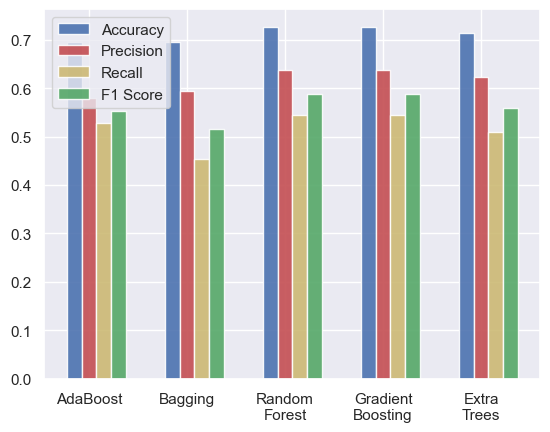

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
n= 5
x = [0.6948051948051948 , 0.6948051948051948 , 0.7272727272727273 , 0.7272727272727273 , 0.7142857142857143 ]
y = [ 0.58 , 0.5952380952380952 , 0.6382978723404256 , 0.6382978723404256 , 0.6222222222222222 ]
z = [ 0.5272727272727272 , 0.45454545454545453 , 0.5454545454545454 , 0.5454545454545454 , 0.509090909090909 ]
w = [ 0.5523809523809523 , 0.5154639175257733 , 0.5882352941176471 , 0.5882352941176471 , 0.5599999999999999 ]
index = np.arange(n)
bar_width = 0.15
opacity = 0.9

r1 = plt.bar(index, x, bar_width,
alpha=opacity, color='b', label='Accuracy')
 
r2 = plt.bar(index + bar_width,y, bar_width,
alpha=opacity, color='r', label='Precision')

r3 = plt.bar(index + (2*bar_width),z, bar_width,
alpha=opacity, color='y', label='Recall')

r4 = plt.bar(index + (3*bar_width),w, bar_width,
alpha=opacity, color='g', label='F1 Score')
plt.xticks(index + (bar_width),('AdaBoost','Bagging','Random\nForest','Gradient\nBoosting','Extra\nTrees'))

plt.legend()
plt.show()

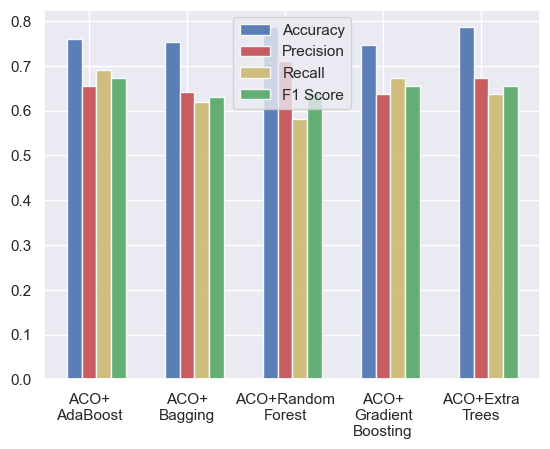

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
n= 5
x = [0.7597402597402598 , 0.7532467532467533 , 0.7857142857142857 , 0.7467532467532467 , 0.7857142857142857 ]
y = [ 0.6551724137931034, 0.6415094339622641 , 0.7111111111111111 , 0.6379310344827587 , 0.6730769230769231 ]
z = [ 0.6909090909090909, 0.6181818181818182 , 0.5818181818181818 , 0.6727272727272727 , 0.6363636363636364 ]
w = [ 0.6725663716814159 , 0.6296296296296297, 0.64 , 0.6548672566371682 , 0.6542056074766355 ]
index = np.arange(n)
bar_width = 0.15
opacity = 0.9

r1 = plt.bar(index, x, bar_width,
alpha=opacity, color='b', label='Accuracy')
 
r2 = plt.bar(index + bar_width,y, bar_width,
alpha=opacity, color='r', label='Precision')

r3 = plt.bar(index + (2*bar_width),z, bar_width,
alpha=opacity, color='y', label='Recall')

r4 = plt.bar(index + (3*bar_width),w, bar_width,
alpha=opacity, color='g', label='F1 Score')
plt.xticks(index + (bar_width),('ACO+\nAdaBoost','ACO+\nBagging','ACO+Random\nForest','ACO+\nGradient\nBoosting' ,
                                'ACO+Extra\nTrees'))

plt.legend()
plt.show()